<a href="https://colab.research.google.com/github/DarenYT/GA-Capstone-Project/blob/main/code/5_Modelling_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [35]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 12 18:47:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    31W /  70W |   2794MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [36]:
import os 
import zipfile 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras import Model 
from tensorflow.keras.models import Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import drive, files
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from PIL import Image


In [37]:
np.random.seed=42

In [38]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Generation

In [207]:
train_path='drive/My Drive/google_images/train'
test_path='drive/My Drive/google_images/test'
val_path='drive/My Drive/google_images/val'


In [208]:
class_list = os.listdir(train_path)

In [209]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [210]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [211]:
class_dict = test_generator.class_indices
labels = test_generator.labels
file_names = test_generator.filenames

# Basic CNN

In [44]:
# Instantiate a CNN.
cnn_model = Sequential()

In [45]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters=6,            # number of filters
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(224, 224, 3))) # shape of input (image)

In [46]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [47]:
cnn_model.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

In [48]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [49]:
cnn_model.add(Flatten())

In [50]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [51]:
# Add a final layer with 50 neurons.
cnn_model.add(Dense(len(class_list), activation='softmax'))

In [52]:
# Compile model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [53]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [54]:
# fit the model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 17s 305ms/step - loss: 4.0543 - accuracy: 0.0297 - top_k_categorical_accuracy: 0.1295 - val_loss: 3.8802 - val_accuracy: 0.0457 - val_top_k_categorical_accuracy: 0.1875
Epoch 2/15
50/50 [==============================] - 15s 294ms/step - loss: 3.7993 - accuracy: 0.0663 - top_k_categorical_accuracy: 0.2224 - val_loss: 3.8084 - val_accuracy: 0.0841 - val_top_k_categorical_accuracy: 0.2019
Epoch 3/15
50/50 [==============================] - 15s 294ms/step - loss: 3.4438 - accuracy: 0.1453 - top_k_categorical_accuracy: 0.3898 - val_loss: 3.6545 - val_accuracy: 0.1202 - val_top_k_categorical_accuracy: 0.3029
Epoch 4/15
50/50 [==============================] - 15s 294ms/step - loss: 2.6164 - accuracy: 0.3613 - top_k_categorical_accuracy: 0.6450 - val_loss: 3.4256 - val_accuracy: 0.1899 - val_top_k_categorical_accuracy: 0.3894
Epoch 5/15
50/50 [==============================] - 15s 296ms/step - loss: 1.4796 - accuracy: 0.6526 - top_k_categor

In [55]:
# saving mob model
#cnn_model.save('cnn')
#files.download('cnn')

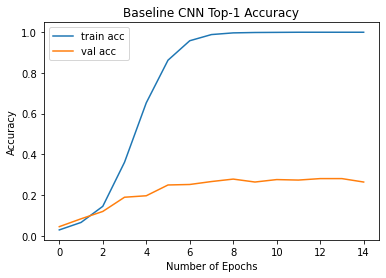

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# accuracies
plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Baseline CNN Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('cnn-acc-rps-1.png')
plt.show()
files.download('cnn-acc-rps-1.png')

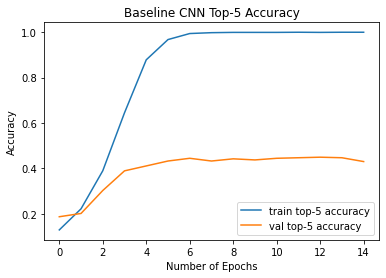

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
# loss
plt.plot(cnn_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(cnn_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('Baseline CNN Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('cnn-top-5-rps-1.png')
plt.show()
files.download('cnn-top-5-rps-1.png')

In [58]:
# evaluate
cnn_model.evaluate(test_generator)

538/538 [==============================] - 5s 10ms/step - loss: 5.3886 - accuracy: 0.2565 - top_k_categorical_accuracy: 0.4294


[5.388577461242676, 0.2565055787563324, 0.4293680191040039]

In [59]:
# predict
test_generator.reset()
pred=cnn_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 5s 9ms/step


In [ ]:
y_pred = np.argmax(pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred, labels))


In [ ]:
def create_prediction_df(pred, failed_class):
    # creating list for predictions and actual Y
    label_map = (test_generator.class_indices)
    label_map = dict((v,k) for k,v in label_map.items())                      #flip k,v              

    predictions = [label_map[k] for k in pred]                                # to create list for predictions 
    label_class = [label_map[k] for k in labels]                              # to create list for labels 

    df = pd.DataFrame(list(zip(label_class, predictions, file_names)),        # to create df for all predictions 
               columns =['actual_y', 'pred', 'names'])
    return df

In [63]:
df = create_prediction_df(y_pred, labels)

In [64]:
df.loc[df['actual_y']==df['pred']]

,actual_y,pred,names
1,acanthus_flower,acanthus_flower,acanthus_flower/198fad40ab.jpg
3,acanthus_flower,acanthus_flower,acanthus_flower/28067f8a14.jpg
8,acanthus_flower,acanthus_flower,acanthus_flower/b69059895a.jpg
10,acanthus_flower,acanthus_flower,acanthus_flower/ec0b225710.jpg
14,adenium_obesum_flower,adenium_obesum_flower,adenium_obesum_flower/6144689112.jpg
...,...,...,...
515,hibiscus_acetosella_flower,hibiscus_acetosella_flower,hibiscus_acetosella_flower/723bdd44ee.jpg
518,hibiscus_acetosella_flower,hibiscus_acetosella_flower,hibiscus_acetosella_flower/b6e6828da2.jpg
525,hibiscus_acetosella_flower,hibiscus_acetosella_flower,hibiscus_acetosella_flower/fbaa804348.jpg
535,hibiscus_coccineus_flower,hibiscus_coccineus_flower,hibiscus_coccineus_flower/85dbf5b9ff.jpg


In [65]:
print(f"The basic CNN model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

The basic CNN model correctly predicted 138 images from 46 classes out of 538 images.


In [66]:
df.loc[df['actual_y']==df['pred']]['names']

1                 acanthus_flower/198fad40ab.jpg
3                 acanthus_flower/28067f8a14.jpg
8                 acanthus_flower/b69059895a.jpg
10                acanthus_flower/ec0b225710.jpg
14          adenium_obesum_flower/6144689112.jpg
                         ...                    
515    hibiscus_acetosella_flower/723bdd44ee.jpg
518    hibiscus_acetosella_flower/b6e6828da2.jpg
525    hibiscus_acetosella_flower/fbaa804348.jpg
535     hibiscus_coccineus_flower/85dbf5b9ff.jpg
536     hibiscus_coccineus_flower/9bbe39e1a7.jpg
Name: names, Length: 138, dtype: object

In [67]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# VGG 19

In [68]:
vgg = VGG19(input_shape=(224,224, 3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [69]:
# do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [70]:
x = Flatten()(vgg.output)

In [71]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

vgg_model = Model(inputs=vgg.input, outputs=prediction)

In [72]:
# view the structure of the model
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [73]:
# Compile model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [74]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [75]:
# fit the model
vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 23s 387ms/step - loss: 4.0383 - accuracy: 0.2198 - top_k_categorical_accuracy: 0.4239 - val_loss: 2.4786 - val_accuracy: 0.4038 - val_top_k_categorical_accuracy: 0.6418
Epoch 2/15
50/50 [==============================] - 18s 353ms/step - loss: 0.7006 - accuracy: 0.8370 - top_k_categorical_accuracy: 0.9520 - val_loss: 2.0580 - val_accuracy: 0.5048 - val_top_k_categorical_accuracy: 0.7452
Epoch 3/15
50/50 [==============================] - 18s 349ms/step - loss: 0.1729 - accuracy: 0.9842 - top_k_categorical_accuracy: 0.9981 - val_loss: 1.7137 - val_accuracy: 0.5385 - val_top_k_categorical_accuracy: 0.7885
Epoch 4/15
50/50 [==============================] - 18s 349ms/step - loss: 0.0667 - accuracy: 0.9968 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.6763 - val_accuracy: 0.5601 - val_top_k_categorical_accuracy: 0.8005
Epoch 5/15
50/50 [==============================] - 17s 349ms/step - loss: 0.0392 - accuracy: 0.9981 - top_k_categor

In [ ]:
# saving vgg model
#vgg_model.save('vgg')
#files.download('vgg')

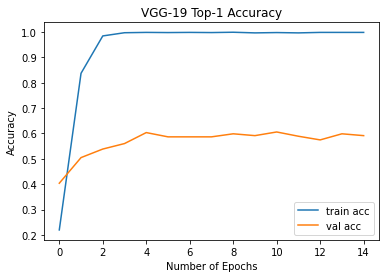

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
# accuracies
plt.plot(vgg_history.history['accuracy'], label='train acc')
plt.plot(vgg_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('VGG-19 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('vgg-acc-rps-1.png')
plt.show()
files.download('vgg-acc-rps-1.png')

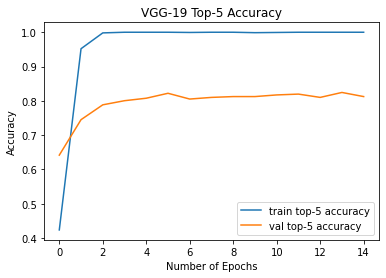

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
# loss
plt.plot(vgg_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(vgg_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('VGG-19 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('vgg-top-5-rps-1.png')
plt.show()
files.download('vgg-top-5-rps-1.png')

In [194]:
# evaluate
vgg_model.evaluate(test_generator)

538/538 [==============================] - 10s 18ms/step - loss: 1.8061 - accuracy: 0.5502 - top_k_categorical_accuracy: 0.8067


[1.806112289428711, 0.5501858592033386, 0.8066914677619934]

In [195]:
# predict
test_generator.reset()
pred=vgg_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 8s 14ms/step


In [196]:
y_pred = np.argmax(pred,axis=1)

In [197]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.43      0.75      0.55         4
           2       0.67      0.42      0.52        19
           3       0.11      0.33      0.17         3
           4       0.59      0.50      0.54        20
           5       0.58      0.78      0.67         9
           6       0.64      0.43      0.51        21
           7       0.77      0.59      0.67        17
           8       0.73      0.61      0.67        18
           9       0.64      0.69      0.67        13
          10       0.67      0.89      0.76         9
          11       0.55      0.67      0.60         9
          12       0.40      0.44      0.42         9
          13       0.30      0.33      0.32         9
          14       0.45      0.42      0.43        12
          15       0.22      0.40      0.29         5
          16       0.50      0.62      0.56         8
          17       0.69    

In [ ]:
df = create_prediction_df(y_pred, labels)

In [ ]:
df.loc[df['actual_y']==df['pred']]

In [ ]:
print(f"The VGG-19 model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

In [ ]:
df.loc[df['actual_y']==df['pred']]['names']

In [ ]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# InceptionV3

In [212]:
inc = InceptionV3(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [213]:
#do not train the pre-trained layers of InceptionV3
for layer in inc.layers:
    layer.trainable = False

In [214]:
x = Flatten()(inc.output)

In [215]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

inc_model = Model(inputs=inc.input, outputs=prediction)

In [216]:
# view the structure of the model
inc_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_191 (Conv2D)            (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_191[0][0]']             
 Normalization)                 )                                                           

In [217]:
# Compile model
inc_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [218]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [219]:
# fit the model
inc_history = inc_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 22s 347ms/step - loss: 14.6599 - accuracy: 0.2906 - top_k_categorical_accuracy: 0.5104 - val_loss: 7.0252 - val_accuracy: 0.4663 - val_top_k_categorical_accuracy: 0.7476
Epoch 2/15
50/50 [==============================] - 16s 320ms/step - loss: 1.7904 - accuracy: 0.8054 - top_k_categorical_accuracy: 0.9501 - val_loss: 6.5537 - val_accuracy: 0.4952 - val_top_k_categorical_accuracy: 0.7957
Epoch 3/15
50/50 [==============================] - 16s 319ms/step - loss: 0.6473 - accuracy: 0.9223 - top_k_categorical_accuracy: 0.9874 - val_loss: 4.4006 - val_accuracy: 0.6034 - val_top_k_categorical_accuracy: 0.8317
Epoch 4/15
50/50 [==============================] - 16s 321ms/step - loss: 0.3235 - accuracy: 0.9627 - top_k_categorical_accuracy: 0.9975 - val_loss: 4.7699 - val_accuracy: 0.5889 - val_top_k_categorical_accuracy: 0.8173
Epoch 5/15
50/50 [==============================] - 16s 317ms/step - loss: 0.2446 - accuracy: 0.9615 - top_k_catego

In [ ]:
# saving mob model
# inc_model.save('inc')
# files.download('inc')

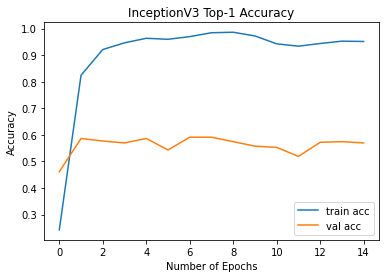

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
# accuracies
plt.plot(inc_history.history['accuracy'], label='train acc')
plt.plot(inc_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('InceptionV3 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('inc-acc-rps-1.png')
plt.show()
files.download('inc-acc-rps-1.png')

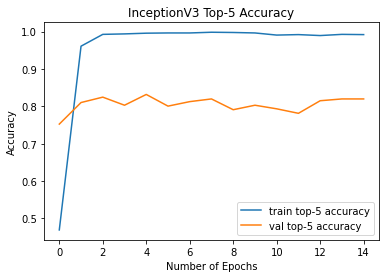

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
# loss
plt.plot(inc_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(inc_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('InceptionV3 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('inc-top-5-rps-1.png')
plt.show()
files.download('inc-top-5-rps-1.png')

In [201]:
# evaluate
inc_model.evaluate(test_generator)

538/538 [==============================] - 10s 19ms/step - loss: 10.2265 - accuracy: 0.5446 - top_k_categorical_accuracy: 0.7677


[10.226533889770508, 0.5446096658706665, 0.767657995223999]

In [200]:
# predict
test_generator.reset()
pred=inc_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 9s 16ms/step


In [ ]:
y_pred = np.argmax(pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred, labels))


In [ ]:
df = create_prediction_df(y_pred, labels)

In [ ]:
df.loc[df['actual_y']==df['pred']]

In [ ]:
print(f"The InceptionV3 correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

In [ ]:
df.loc[df['actual_y']==df['pred']]['names']

In [ ]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# MobileNetV2

In [11]:
mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [12]:
#do not train the pre-trained layers of mob-19
for layer in mob.layers:
    layer.trainable = False

In [13]:
x = Flatten()(mob.output)

In [14]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

mob_model = Model(inputs=mob.input, outputs=prediction)

In [15]:
# view the structure of the model
mob_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [16]:
# Compile model
mob_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [17]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [18]:
# fit the model
mob_history = mob_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 595s 12s/step - loss: 10.0132 - accuracy: 0.3986 - top_k_categorical_accuracy: 0.6639 - val_loss: 7.2000 - val_accuracy: 0.5673 - val_top_k_categorical_accuracy: 0.8101
Epoch 2/15
50/50 [==============================] - 15s 307ms/step - loss: 1.0538 - accuracy: 0.9166 - top_k_categorical_accuracy: 0.9773 - val_loss: 4.9740 - val_accuracy: 0.6611 - val_top_k_categorical_accuracy: 0.8750
Epoch 3/15
50/50 [==============================] - 15s 303ms/step - loss: 0.2570 - accuracy: 0.9735 - top_k_categorical_accuracy: 0.9962 - val_loss: 5.4184 - val_accuracy: 0.6875 - val_top_k_categorical_accuracy: 0.8870
Epoch 4/15
50/50 [==============================] - 15s 305ms/step - loss: 0.3116 - accuracy: 0.9703 - top_k_categorical_accuracy: 0.9987 - val_loss: 6.3148 - val_accuracy: 0.6250 - val_top_k_categorical_accuracy: 0.8486
Epoch 5/15
50/50 [==============================] - 16s 311ms/step - loss: 0.1847 - accuracy: 0.9792 - top_k_categor

In [19]:
# saving mob model
#mob_model.save('mob')
#files.download('mob')

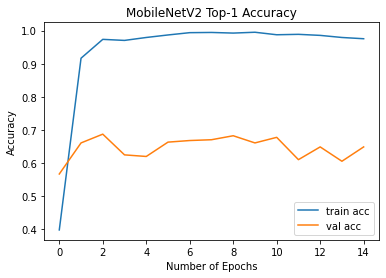

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# accuracies
plt.plot(mob_history.history['accuracy'], label='train acc')
plt.plot(mob_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('MobileNetV2 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('mob-acc-rps-1.png')
plt.show()
files.download('mob-acc-rps-1.png')

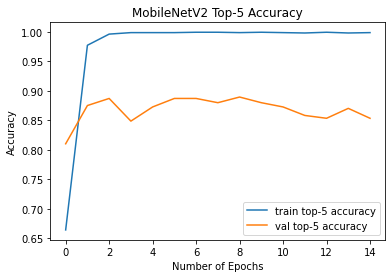

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# loss
plt.plot(mob_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(mob_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('MobileNetV2 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('mob-top-5-rps-1.png')
plt.show()
files.download('mob-top-5-rps-1.png')

In [22]:
# evaluate
mob_model.evaluate(test_generator)

538/538 [==============================] - 174s 324ms/step - loss: 9.2728 - accuracy: 0.6134 - top_k_categorical_accuracy: 0.8401


[9.272809028625488, 0.613382875919342, 0.8401486873626709]

In [23]:
# predict
test_generator.reset()
pred=mob_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 7s 12ms/step


In [24]:
y_pred = np.argmax(pred,axis=1)

In [25]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.92      0.55      0.69        22
           1       0.71      0.14      0.23        37
           2       0.92      0.61      0.73        18
           3       0.56      0.56      0.56         9
           4       0.53      0.82      0.64        11
           5       0.67      0.36      0.47        22
           6       0.71      0.91      0.80        11
           7       0.85      0.69      0.76        16
           8       0.73      0.92      0.81        12
           9       0.50      0.64      0.56        11
          10       0.67      0.89      0.76         9
          11       0.73      0.53      0.62        15
          12       0.40      1.00      0.57         4
          13       0.50      0.71      0.59         7
          14       0.82      0.43      0.56        21
          15       0.56      0.71      0.63         7
          16       0.40      0.33      0.36        12
          17       0.77    

In [26]:
df = create_prediction_df(y_pred, labels)

NameError: ignored

In [ ]:
df.loc[df['actual_y']==df['pred']]

In [ ]:
print(f"The MobileNetV2 correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

In [ ]:
df.loc[df['actual_y']==df['pred']]['names']

In [ ]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# EfficientNetB3


In [220]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [221]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (300, 300),
                                                 batch_size = 30,
                                                 class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (300, 300),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False)
val_generator = val_datagen.flow_from_directory(val_path,
                                            target_size = (300, 300),
                                            batch_size = 30,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [222]:
enet = EfficientNetB3(input_shape=(300,300, 3), weights='imagenet', include_top=False)

In [223]:
#do not train the pre-trained layers of enet
for layer in enet.layers:
    layer.trainable = False

In [224]:
x = Flatten()(enet.output)

In [225]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

enet_model = Model(inputs=enet.input, outputs=prediction)

In [226]:
# view the structure of the model
enet_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 300, 300, 3)  0           ['input_10[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 300, 300, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [227]:
# Compile model
enet_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [228]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [229]:
# fit the model
enet_history = enet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
53/53 [==============================] - 30s 404ms/step - loss: 173.9489 - accuracy: 0.0202 - top_k_categorical_accuracy: 0.1060 - val_loss: 134.4501 - val_accuracy: 0.0167 - val_top_k_categorical_accuracy: 0.1071
Epoch 2/15
53/53 [==============================] - 19s 363ms/step - loss: 67.8223 - accuracy: 0.0189 - top_k_categorical_accuracy: 0.1028 - val_loss: 61.1843 - val_accuracy: 0.0238 - val_top_k_categorical_accuracy: 0.1024
Epoch 3/15
53/53 [==============================] - 19s 367ms/step - loss: 67.9136 - accuracy: 0.0151 - top_k_categorical_accuracy: 0.0940 - val_loss: 71.1208 - val_accuracy: 0.0262 - val_top_k_categorical_accuracy: 0.0952
Epoch 4/15
53/53 [==============================] - 19s 365ms/step - loss: 70.5286 - accuracy: 0.0189 - top_k_categorical_accuracy: 0.0959 - val_loss: 70.7256 - val_accuracy: 0.0190 - val_top_k_categorical_accuracy: 0.1048
Epoch 5/15
53/53 [==============================] - 19s 364ms/step - loss: 70.0529 - accuracy: 0.0233 - to

In [230]:
# saving mob model
#enet_model.save('enet')
#files.download('enet')

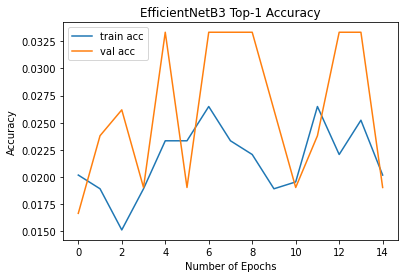

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [231]:
# accuracies
plt.plot(enet_history.history['accuracy'], label='train acc')
plt.plot(enet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('EfficientNetB3 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('enet-acc-rps-1.png')
plt.show()
files.download('enet-acc-rps-1.png')

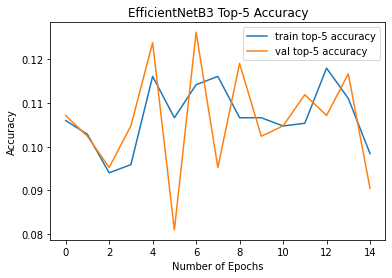

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [232]:
# loss
plt.plot(enet_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(enet_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('EfficientNetB3 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('enet-top-5-rps-1.png')
plt.show()
files.download('enet-top-5-rps-1.png')

In [233]:
# evaluate
enet_model.evaluate(test_generator)

538/538 [==============================] - 12s 23ms/step - loss: 65.3615 - accuracy: 0.0186 - top_k_categorical_accuracy: 0.0911


[65.36151885986328, 0.01858736015856266, 0.09107806533575058]

In [234]:
# predict
test_generator.reset()
pred=enet_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 13s 21ms/step


In [235]:
y_pred = np.argmax(pred,axis=1)

In [236]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
df = create_prediction_df(y_pred, labels)

In [238]:
df.loc[df['actual_y']==df['pred']]

,actual_y,pred,names
338,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/01b1ff7909.jpg
339,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/0b2c288215.jpg
340,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/19abf6cc82.jpg
341,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/1ca4e4fe15.jpg
342,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/7b165484c9.jpg
343,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/7c4bb1b0af.jpg
344,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/b8a96814ae.jpg
345,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/bb82cd787a.jpg
346,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/f549d3d2dd.jpg
347,costus_woodsonii_flower,costus_woodsonii_flower,costus_woodsonii_flower/fd95de4494.jpg


In [239]:
print(f"The EfficientNetB3 model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

The EfficientNetB3 model correctly predicted 10 images from 1 classes out of 538 images.


In [240]:
df.loc[df['actual_y']==df['pred']]['names']

338    costus_woodsonii_flower/01b1ff7909.jpg
339    costus_woodsonii_flower/0b2c288215.jpg
340    costus_woodsonii_flower/19abf6cc82.jpg
341    costus_woodsonii_flower/1ca4e4fe15.jpg
342    costus_woodsonii_flower/7b165484c9.jpg
343    costus_woodsonii_flower/7c4bb1b0af.jpg
344    costus_woodsonii_flower/b8a96814ae.jpg
345    costus_woodsonii_flower/bb82cd787a.jpg
346    costus_woodsonii_flower/f549d3d2dd.jpg
347    costus_woodsonii_flower/fd95de4494.jpg
Name: names, dtype: object

In [241]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# MobileNetV2 (Augmented Data)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2, 
    brightness_range = [0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False)
val_generator = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
aug_mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [ ]:
#do not train the pre-trained layers of aug_mob-19
for layer in aug_mob.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(aug_mob.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

aug_mob_model = Model(inputs=aug_mob.input, outputs=prediction)

In [ ]:
# view the structure of the model
aug_mob_model.summary()

In [ ]:
# Compile model
aug_mob_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [ ]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [139]:
# fit the model
aug_mob_history = aug_mob_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 36s 677ms/step - loss: 15.0614 - accuracy: 0.2817 - top_k_categorical_accuracy: 0.5167 - val_loss: 7.8921 - val_accuracy: 0.4688 - val_top_k_categorical_accuracy: 0.7909
Epoch 2/15
50/50 [==============================] - 33s 657ms/step - loss: 5.3822 - accuracy: 0.6300 - top_k_categorical_accuracy: 0.8575 - val_loss: 5.8610 - val_accuracy: 0.6178 - val_top_k_categorical_accuracy: 0.8558
Epoch 3/15
50/50 [==============================] - 33s 654ms/step - loss: 3.8605 - accuracy: 0.7037 - top_k_categorical_accuracy: 0.9217 - val_loss: 6.8787 - val_accuracy: 0.6178 - val_top_k_categorical_accuracy: 0.8822
Epoch 4/15
50/50 [==============================] - 33s 653ms/step - loss: 3.5451 - accuracy: 0.7492 - top_k_categorical_accuracy: 0.9482 - val_loss: 6.8065 - val_accuracy: 0.6130 - val_top_k_categorical_accuracy: 0.8582
Epoch 5/15
50/50 [==============================] - 33s 656ms/step - loss: 3.2006 - accuracy: 0.7720 - top_k_catego

In [ ]:
# saving aug_mob model
#aug_mob_model.save('aug_mob')
#files.download('aug_mob')

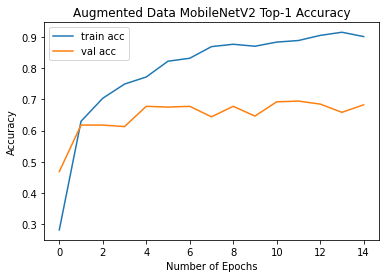

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
# accuracies
plt.plot(aug_mob_history.history['accuracy'], label='train acc')
plt.plot(aug_mob_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Augmented Data MobileNetV2 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('aug_mob-acc-rps-1.png')
plt.show()
files.download('aug_mob-acc-rps-1.png')

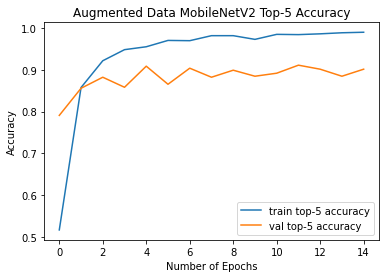

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
# loss
plt.plot(aug_mob_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(aug_mob_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('Augmented Data MobileNetV2 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('aug_mob-top-5-rps-1.png')
plt.show()
files.download('aug_mob-top-5-rps-1.png')

In [185]:
# evaluate
aug_mob_model.evaluate(test_generator)

538/538 [==============================] - 8s 14ms/step - loss: 10.3936 - accuracy: 0.6654 - top_k_categorical_accuracy: 0.8773


[10.393610000610352, 0.6654275059700012, 0.8773234486579895]

In [186]:
# predict
test_generator.reset()
pred=aug_mob_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 7s 12ms/step


In [187]:
y_pred = np.argmax(pred,axis=1)

In [188]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.71      0.56      0.63         9
           2       0.75      1.00      0.86         9
           3       0.44      0.80      0.57         5
           4       0.53      0.82      0.64        11
           5       0.42      1.00      0.59         5
           6       0.86      0.92      0.89        13
           7       0.92      0.57      0.71        21
           8       0.73      0.58      0.65        19
           9       0.50      0.64      0.56        11
          10       0.75      1.00      0.86         9
          11       0.45      1.00      0.62         5
          12       0.60      0.86      0.71         7
          13       0.80      0.57      0.67        14
          14       0.64      0.50      0.56        14
          15       0.56      0.71      0.63         7
          16       0.60      0.55      0.57        11
          17       0.69    

In [189]:
df = create_prediction_df(y_pred, labels)

In [ ]:
df.to_csv('drive/My Drive/final_model_predictions.csv')

In [296]:
wrong_predict_df = df.loc[df['actual_y']!=df['pred']]

In [ ]:
wrong_predict_df.to_csv('drive/My Drive/final_model_wrong_predictions.csv')

In [299]:
wrong_predict_df['pred'].value_counts()

arachnothryx_leucophylla_flower     42
allamanda_cathartica_flower         32
asclepias_currassavica_flower       19
cosmos_bipinnatus_flower            15
allamanda_blanchetti_flower         13
helianthus_annuus_flower            12
hibiscus_coccineus_flower           12
caesalpinia_pulcherrima_flower      10
gardenia_scabrella_flower           10
alpinia_purpurata_flower            10
anthurium_andreanum_flower           9
cosmos_sulphureus_flower             8
hibiscus_acetosella_flower           8
arundina_flower                      8
calliandra_haematocephala_flower     7
aranda_flower                        7
heliconia_psittacorum_flower         7
crinum_asiaticum_flower              7
angelonia_biflora_flower             7
guzmania_flower                      5
callistemon_viminalis_flower         4
clerodendrum_thomsoniae_flower       4
heliconia_x_nickeriensis_flower      4
cassia_javanica_flower               3
cascabela_thevetia_flower            3
bougainvillea_flower     

In [305]:
wrong_predict_df[wrong_predict_df['pred']=='arachnothryx_leucophylla_flower']

,actual_y,pred,names
17,adenium_obesum_flower,arachnothryx_leucophylla_flower,adenium_obesum_flower/b63e9da674.jpg
19,adenium_obesum_flower,arachnothryx_leucophylla_flower,adenium_obesum_flower/f62df5d057.jpg
23,aglaia_odorata_flower,arachnothryx_leucophylla_flower,aglaia_odorata_flower/381e11de09.jpg
28,aglaia_odorata_flower,arachnothryx_leucophylla_flower,aglaia_odorata_flower/a4f2adbf07.jpg
37,allamanda_blanchetti_flower,arachnothryx_leucophylla_flower,allamanda_blanchetti_flower/b2445bea8a.jpg
63,alpinia_purpurata_flower,arachnothryx_leucophylla_flower,alpinia_purpurata_flower/50f080ce7c.jpg
67,alpinia_purpurata_flower,arachnothryx_leucophylla_flower,alpinia_purpurata_flower/a27e81406a.jpg
70,angelonia_biflora_flower,arachnothryx_leucophylla_flower,angelonia_biflora_flower/13230cd381.jpg
81,angelonia_biflora_flower,arachnothryx_leucophylla_flower,angelonia_biflora_flower/e836c4921a.jpg
92,anthurium_andreanum_flower,arachnothryx_leucophylla_flower,anthurium_andreanum_flower/b72fbed69e.jpg


In [304]:
wrong_predict_df[wrong_predict_df['pred']=='arachnothryx_leucophylla_flower']['actual_y'].value_counts()

bougainvillea_flower               6
bauhinia_kockiana_flower           5
celosia_argentea_flower            5
adenium_obesum_flower              2
alpinia_purpurata_flower           2
angelonia_biflora_flower           2
cymbidium_flower                   2
brunfelsia_americana_flower        2
aglaia_odorata_flower              2
clerodendrum_splendens_flower      2
cochlospermum_religiosum_flower    1
guzmania_flower                    1
dianthus_barbatus_flower           1
dendrobium_flower                  1
costus_woodsonii_flower            1
caesalpinia_pulcherrima_flower     1
cassia_javanica_flower             1
bauhinia_galpinii_flower           1
aranda_flower                      1
anthurium_andreanum_flower         1
allamanda_blanchetti_flower        1
hibiscus_coccineus_flower          1
Name: actual_y, dtype: int64

In [307]:
wrong_predict_df[wrong_predict_df['pred']=='allamanda_cathartica_flower']

,actual_y,pred,names
14,adenium_obesum_flower,allamanda_cathartica_flower,adenium_obesum_flower/6144689112.jpg
20,aglaia_odorata_flower,allamanda_cathartica_flower,aglaia_odorata_flower/0df382bd71.jpg
182,brunfelsia_americana_flower,allamanda_cathartica_flower,brunfelsia_americana_flower/14fbba4353.jpg
185,brunfelsia_americana_flower,allamanda_cathartica_flower,brunfelsia_americana_flower/460ebfc37a.jpg
188,brunfelsia_americana_flower,allamanda_cathartica_flower,brunfelsia_americana_flower/d98abb7fac.jpg
227,cananga_odorata_flower,allamanda_cathartica_flower,cananga_odorata_flower/be013ac62e.jpg
236,canna_flower,allamanda_cathartica_flower,canna_flower/684c5c2def.jpg
245,cascabela_thevetia_flower,allamanda_cathartica_flower,cascabela_thevetia_flower/95cd745874.jpg
246,cascabela_thevetia_flower,allamanda_cathartica_flower,cascabela_thevetia_flower/b83ad38c56.jpg
247,cascabela_thevetia_flower,allamanda_cathartica_flower,cascabela_thevetia_flower/c182066ccb.jpg


In [308]:
wrong_predict_df[wrong_predict_df['pred']=='allamanda_cathartica_flower']['actual_y'].value_counts()

cascabela_thevetia_flower          5
cochlospermum_religiosum_flower    4
brunfelsia_americana_flower        3
crinum_asiaticum_flower            3
cymbidium_flower                   3
gardenia_scabrella_flower          2
dillenia_philippinensis_flower     2
adenium_obesum_flower              1
dendrobium_flower                  1
guzmania_flower                    1
gardenia_vietnamensis_flower       1
costus_woodsonii_flower            1
aglaia_odorata_flower              1
catharanthus_roseus_flower         1
canna_flower                       1
cananga_odorata_flower             1
helianthus_annuus_flower           1
Name: actual_y, dtype: int64

In [191]:
print(f"The augmented data MobileNetV2 model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

The augmented data MobileNetV2 model correctly predicted 358 images from 50 classes out of 538 images.


In [ ]:
df.loc[df['actual_y']==df['pred']]['names']

In [ ]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# MobileNetV2 (Unfrozen)

In [242]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False)
val_generator = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [243]:
unfrozen_mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [244]:
#do not train the pre-trained layers of unfrozen_mob-19
for layer in unfrozen_mob.layers:
    layer.trainable = True

In [245]:
x = Flatten()(unfrozen_mob.output)

In [246]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

unfrozen_mob_model = Model(inputs=unfrozen_mob.input, outputs=prediction)

In [247]:
# view the structure of the model
unfrozen_mob_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                          

In [248]:
# Compile model
unfrozen_mob_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [249]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [250]:
# fit the model
unfrozen_mob_history = unfrozen_mob_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 24s 382ms/step - loss: 4.8340 - accuracy: 0.2476 - top_k_categorical_accuracy: 0.4972 - val_loss: 78.7567 - val_accuracy: 0.0433 - val_top_k_categorical_accuracy: 0.1779
Epoch 2/15
50/50 [==============================] - 18s 353ms/step - loss: 4.1415 - accuracy: 0.4258 - top_k_categorical_accuracy: 0.7378 - val_loss: 85.8767 - val_accuracy: 0.0168 - val_top_k_categorical_accuracy: 0.1058
Epoch 3/15
50/50 [==============================] - 18s 352ms/step - loss: 3.5614 - accuracy: 0.4618 - top_k_categorical_accuracy: 0.7726 - val_loss: 86.0037 - val_accuracy: 0.0168 - val_top_k_categorical_accuracy: 0.1130
Epoch 4/15
50/50 [==============================] - 18s 351ms/step - loss: 2.4292 - accuracy: 0.5578 - top_k_categorical_accuracy: 0.8440 - val_loss: 76.8665 - val_accuracy: 0.0216 - val_top_k_categorical_accuracy: 0.1154
Epoch 5/15
50/50 [==============================] - 18s 357ms/step - loss: 1.5532 - accuracy: 0.6816 - top_k_cat

In [251]:
# saving mob model
#unfrozen_mob_model.save('unfrozen_mob')
#files.download('unfrozen_mob')

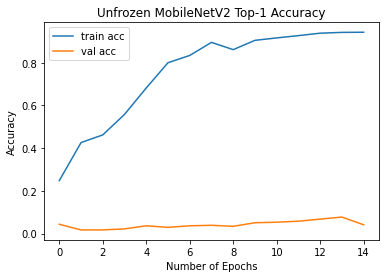

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [252]:
# accuracies
plt.plot(unfrozen_mob_history.history['accuracy'], label='train acc')
plt.plot(unfrozen_mob_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Unfrozen MobileNetV2 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('unfrozen_mob-acc-rps-1.png')
plt.show()
files.download('unfrozen_mob-acc-rps-1.png')

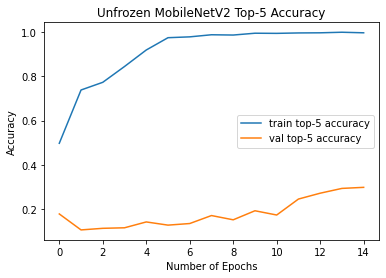

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [253]:
# loss
plt.plot(unfrozen_mob_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(unfrozen_mob_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('Unfrozen MobileNetV2 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('unfrozen_mob-top-5-rps-1.png')
plt.show()
files.download('unfrozen_mob-top-5-rps-1.png')

In [254]:
# evaluate
unfrozen_mob_model.evaluate(test_generator)

538/538 [==============================] - 7s 14ms/step - loss: 68.1615 - accuracy: 0.0335 - top_k_categorical_accuracy: 0.2770


[68.16146087646484, 0.03345724940299988, 0.2769516706466675]

In [255]:
# predict
test_generator.reset()
pred=unfrozen_mob_model.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 7s 12ms/step


In [256]:
y_pred = np.argmax(pred,axis=1)

In [257]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           4       0.12      0.22      0.15         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.07      1.00      0.12         1
           9       0.00      0.00      0.00         0
          10       0.08      0.20      0.12         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       1.00      0.02      0.04       497
          17       0.15    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
df = create_prediction_df(y_pred, labels)

In [259]:
df.loc[df['actual_y']==df['pred']]

,actual_y,pred,names
43,allamanda_cathartica_flower,allamanda_cathartica_flower,allamanda_cathartica_flower/1c0e8d8dd6.jpg
45,allamanda_cathartica_flower,allamanda_cathartica_flower,allamanda_cathartica_flower/2bd9108c5a.jpg
105,arachnothryx_leucophylla_flower,arachnothryx_leucophylla_flower,arachnothryx_leucophylla_flower/976d033ea5.jpg
133,arundina_flower,arundina_flower,arundina_flower/c96473a6eb.jpg
189,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/01724666ee.jpg
190,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/2a4621f4a5.jpg
191,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/31a88090c0.jpg
192,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/38400fb9fe.jpg
193,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/80396fd7b6.jpg
194,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower,caesalpinia_pulcherrima_flower/8865bb6dd4.jpg


In [260]:
print(f"The unfrozen MobileNetV2 model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

The unfrozen MobileNetV2 model correctly predicted 18 images from 6 classes out of 538 images.


In [261]:
df.loc[df['actual_y']==df['pred']]['names']

43          allamanda_cathartica_flower/1c0e8d8dd6.jpg
45          allamanda_cathartica_flower/2bd9108c5a.jpg
105     arachnothryx_leucophylla_flower/976d033ea5.jpg
133                     arundina_flower/c96473a6eb.jpg
189      caesalpinia_pulcherrima_flower/01724666ee.jpg
190      caesalpinia_pulcherrima_flower/2a4621f4a5.jpg
191      caesalpinia_pulcherrima_flower/31a88090c0.jpg
192      caesalpinia_pulcherrima_flower/38400fb9fe.jpg
193      caesalpinia_pulcherrima_flower/80396fd7b6.jpg
194      caesalpinia_pulcherrima_flower/8865bb6dd4.jpg
195      caesalpinia_pulcherrima_flower/9478329c2f.jpg
196      caesalpinia_pulcherrima_flower/b191fcac73.jpg
197      caesalpinia_pulcherrima_flower/b63f5ec9dc.jpg
198      caesalpinia_pulcherrima_flower/b8b2b634c6.jpg
204    calliandra_haematocephala_flower/80cf878b73.jpg
206    calliandra_haematocephala_flower/ac8e1e3f19.jpg
325            cosmos_bipinnatus_flower/856d69d0c9.jpg
326            cosmos_bipinnatus_flower/a7389bc766.jpg
Name: name

In [262]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])

# MobileNetV2 (Unfrozen, Tuned)

In [263]:
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2

def create_mobilenet_unfreezeAll_finetune():
    image_size = [224,224]
    #instantiate transfer learning wihtout including top layer
    mobilenetv2 = MobileNetV2(input_shape= image_size + [3], weights = 'imagenet', include_top = False)

    # UNFREEZE all layers first
    mobilenetv2.trainable = True 

    # initial layers 
    x = tf.keras.layers.GlobalAveragePooling2D()(mobilenetv2.output)
    x = tf.keras.layers.Reshape((1, 1, 1280))(x)
    x = tf.keras.layers.Dropout(0.3, name='Dropout')(x)
    x = tf.keras.layers.Conv2D(len(class_list), (1, 1), padding='same')(x)
    x = tf.keras.layers.Activation('softmax', name='final_activation')(x)
    prediction = tf.keras.layers.Reshape((len(class_list),), name='output')(x)
   
    # create a model object 
    model_mobilenet = Model(inputs = mobilenetv2.input, outputs = prediction)
    
    # Compile model
    base_learning_rate = 0.001

    model_mobilenet.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/100),
        loss= 'categorical_crossentropy',
        metrics=['accuracy', 'top_k_categorical_accuracy']
        )
                           
    
    return model_mobilenet

In [264]:
tuned_unfrozen_mob = create_mobilenet_unfreezeAll_finetune()

In [265]:
# Include checkpoint 

#checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                verbose=1)

In [266]:
# fit the model
tuned_unfrozen_mob_history = tuned_unfrozen_mob.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n//val_generator.batch_size,
    epochs=15,
    shuffle=True,
    verbose=1
)

Epoch 1/15
50/50 [==============================] - 27s 382ms/step - loss: 4.3279 - accuracy: 0.0269 - top_k_categorical_accuracy: 0.1269 - val_loss: 4.1456 - val_accuracy: 0.0481 - val_top_k_categorical_accuracy: 0.1707
Epoch 2/15
50/50 [==============================] - 18s 367ms/step - loss: 4.0147 - accuracy: 0.0594 - top_k_categorical_accuracy: 0.1895 - val_loss: 4.0037 - val_accuracy: 0.0625 - val_top_k_categorical_accuracy: 0.1947
Epoch 3/15
50/50 [==============================] - 18s 358ms/step - loss: 3.7761 - accuracy: 0.0802 - top_k_categorical_accuracy: 0.2577 - val_loss: 3.8578 - val_accuracy: 0.0841 - val_top_k_categorical_accuracy: 0.2356
Epoch 4/15
50/50 [==============================] - 18s 355ms/step - loss: 3.5247 - accuracy: 0.1276 - top_k_categorical_accuracy: 0.3474 - val_loss: 3.6931 - val_accuracy: 0.1130 - val_top_k_categorical_accuracy: 0.2885
Epoch 5/15
50/50 [==============================] - 18s 359ms/step - loss: 3.3029 - accuracy: 0.1687 - top_k_categor

In [267]:
# saving mob model
#tuned_unfrozen_mob_model.save('tuned_unfrozen_mob')
#files.download('tuned_unfrozen_mob')

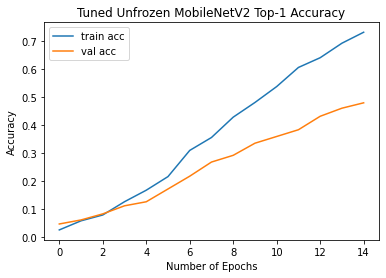

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [268]:
# accuracies
plt.plot(tuned_unfrozen_mob_history.history['accuracy'], label='train acc')
plt.plot(tuned_unfrozen_mob_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Tuned Unfrozen MobileNetV2 Top-1 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('tuned_unfrozen_mob-acc-rps-1.png')
plt.show()
files.download('tuned_unfrozen_mob-acc-rps-1.png')

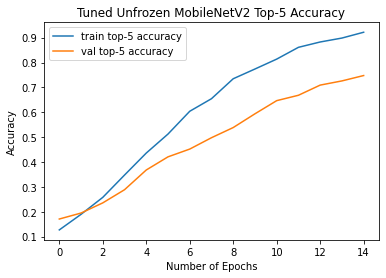

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [269]:
# loss
plt.plot(tuned_unfrozen_mob_history.history['top_k_categorical_accuracy'], label='train top-5 accuracy')
plt.plot(tuned_unfrozen_mob_history.history['val_top_k_categorical_accuracy'], label='val top-5 accuracy')
plt.legend()
plt.title('Tuned Unfrozen MobileNetV2 Top-5 Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.savefig('tuned_unfrozen_mob-top-5-rps-1.png')
plt.show()
files.download('tuned_unfrozen_mob-top-5-rps-1.png')

In [271]:
# evaluate
tuned_unfrozen_mob.evaluate(test_generator)

538/538 [==============================] - 7s 14ms/step - loss: 2.2472 - accuracy: 0.4647 - top_k_categorical_accuracy: 0.7565


[2.2471933364868164, 0.46468400955200195, 0.75650554895401]

In [272]:
# predict
test_generator.reset()
pred=tuned_unfrozen_mob.predict(test_generator,
steps=test_generator.n//test_generator.batch_size,
verbose=1)

538/538 [==============================] - 7s 12ms/step


In [273]:
y_pred = np.argmax(pred,axis=1)

In [274]:
#get classification report
print(classification_report(y_pred, labels))


              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.56      0.28      0.37        18
           4       0.88      0.32      0.47        47
           5       0.83      0.50      0.62        20
           6       0.86      0.63      0.73        19
           7       0.46      0.40      0.43        15
           8       0.87      0.24      0.37        55
           9       0.36      0.42      0.38        12
          10       0.83      0.56      0.67        18
          11       0.82      0.32      0.46        28
          12       0.10      0.50      0.17         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.22      0.50      0.31         4
          16       0.80      0.44      0.57        18
          17       0.85    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
df = create_prediction_df(y_pred, labels)

In [276]:
df.loc[df['actual_y']==df['pred']]

,actual_y,pred,names
0,acanthus_flower,acanthus_flower,acanthus_flower/17a8830381.jpg
5,acanthus_flower,acanthus_flower,acanthus_flower/36c4d4dbd3.jpg
6,acanthus_flower,acanthus_flower,acanthus_flower/38ca13746b.jpg
7,acanthus_flower,acanthus_flower,acanthus_flower/45f40e2bbe.jpg
10,acanthus_flower,acanthus_flower,acanthus_flower/ec0b225710.jpg
...,...,...,...
531,hibiscus_coccineus_flower,hibiscus_coccineus_flower,hibiscus_coccineus_flower/40f9e46e76.jpg
533,hibiscus_coccineus_flower,hibiscus_coccineus_flower,hibiscus_coccineus_flower/4b6c9c4cd5.jpg
534,hibiscus_coccineus_flower,hibiscus_coccineus_flower,hibiscus_coccineus_flower/745d985a9a.jpg
535,hibiscus_coccineus_flower,hibiscus_coccineus_flower,hibiscus_coccineus_flower/85dbf5b9ff.jpg


In [277]:
print(f"The unfrozen tuned MobileNetV2 model correctly predicted {df.loc[df['actual_y']==df['pred']].shape[0]} images from {df.loc[df['actual_y']==df['pred']]['actual_y'].value_counts().count()} classes out of {len(test_generator.labels)} images.")

The unfrozen tuned MobileNetV2 model correctly predicted 250 images from 45 classes out of 538 images.


In [278]:
df.loc[df['actual_y']==df['pred']]['names']

0                acanthus_flower/17a8830381.jpg
5                acanthus_flower/36c4d4dbd3.jpg
6                acanthus_flower/38ca13746b.jpg
7                acanthus_flower/45f40e2bbe.jpg
10               acanthus_flower/ec0b225710.jpg
                         ...                   
531    hibiscus_coccineus_flower/40f9e46e76.jpg
533    hibiscus_coccineus_flower/4b6c9c4cd5.jpg
534    hibiscus_coccineus_flower/745d985a9a.jpg
535    hibiscus_coccineus_flower/85dbf5b9ff.jpg
537    hibiscus_coccineus_flower/d2e171aed4.jpg
Name: names, Length: 250, dtype: object

In [ ]:
#Image.open(test_path+'/'+list(df.loc[df['actual_y']==df['pred']]['names'])[0])